## Homework 2  - Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#! wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-24 11:35:58--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M  --.-KB/s    in 0,1s    

2023-09-24 11:35:58 (11,8 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [34]:
df = pd.read_csv('housing.csv')

In [35]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## 1. EDA - Exploratory data analysis
Look at the median_house_value variable. Does it have a long tail?

In [7]:
print(df.median_house_value.isnull().sum())
print(df.median_house_value.max())
print(df.median_house_value.min())

0
500001.0
14999.0


<Axes: xlabel='median_house_value', ylabel='Count'>

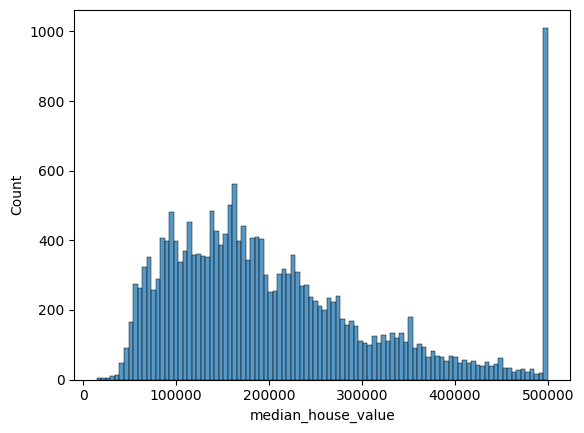

In [6]:
sns.histplot(df.median_house_value, bins=100)

## data preperation   
First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'  
Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [16]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [36]:
df_data = df[df.ocean_proximity.isin(['<1H OCEAN','INLAND'])]
df_data = df_data[['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']]
df_data

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


### Question 1
There's one feature with missing values. What is it?  
- total_bedrooms

In [28]:
df_data.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2
What's the median (50% percentile) for variable 'population'?

In [31]:
print(df_data.population.median())
print(df_data.population.quantile(q=0.5))

1195.0
1195.0


Prepare and split the dataset  
Shuffle the dataset (the filtered one you created above), use seed 42.  
Split your data in train/val/test sets, with 60%/20%/20% distribution.  
Apply the log transformation to the median_house_value variable using the np.log1p() function.  

In [37]:
print(df_data.median_house_value.iloc[:10])
df_data.median_house_value = np.log1p(df_data.median_house_value)
print(df_data.median_house_value.iloc[:10])

701    431000.0
830    217000.0
859    247600.0
860    283500.0
861    216900.0
862    282500.0
863    295600.0
870    300000.0
880    269700.0
881    231200.0
Name: median_house_value, dtype: float64
701    12.973866
830    12.287657
859    12.419574
860    12.554971
861    12.287196
862    12.551437
863    12.596766
870    12.611541
880    12.505069
881    12.351043
Name: median_house_value, dtype: float64


In [38]:
n = df_data.shape[0]
print(n)

15687


In [39]:
shuffle_idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(shuffle_idx)

percent60 = int(shuffle_idx.size*0.6) # size of 60%
percent80 = int(shuffle_idx.size*0.8) # size of 80%

df_train =  df_data.iloc[shuffle_idx[:percent60]]
df_val   =  df_data.iloc[shuffle_idx[percent60:percent80]]
df_test  =  df_data.iloc[shuffle_idx[percent80:]]

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

df_train.drop('median_house_value', axis=1, inplace=True)
df_val.drop('median_house_value', axis=1, inplace=True)
df_test.drop('median_house_value', axis=1, inplace=True)

print(df_train.shape[0])
print(df_val.shape[0])
print(df_test.shape[0])
print(df_train.shape[0] + df_test.shape[0] + df_val.shape[0])


9412
3137
3138
15687


### Question 3   
We need to deal with missing values for the column from Q1.  
We have two options: fill it with 0 or with the mean of this variable.  
Try both options. For each, train a linear regression model without regularization using the code from the lessons.  
For computing the mean, use the training only!  
Use the validation dataset to evaluate the models and compare the RMSE of each option.  
Round the RMSE scores to 2 decimal digits using round(score, 2)  
Which option gives better RMSE?  
Options:  

With 0  
With mean  
Both are equally good  


In [14]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [15]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [16]:
# model 1 : fill missing values with 0
df_train_1, df_val_1, df_test_1 = df_train, df_val, df_test
df_train_1.total_bedrooms.fillna(0.0, inplace=True)
df_val_1.total_bedrooms.fillna(0.0, inplace=True)
df_train_1.isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [17]:
X_train_1 = df_train_1.values
X_val_1 = df_val_1.values

w0, w = train_linear_regression(X_train_1, y_train)

y_pred_1 = w0 + X_val_1.dot(w)

In [18]:
w[4]

0.0003033879785717586

In [19]:
# model 2 : fill missing values with 0
df_train_2, df_val_2, df_test_2 = df_train, df_val, df_test
mean_bedroom = df_train_2.total_bedrooms.mean()
print(mean_bedroom)
df_train_2.total_bedrooms.fillna(mean_bedroom, inplace=True)
df_val_2.total_bedrooms.fillna(mean_bedroom, inplace=True)
df_train_2.isnull().sum()

533.4771568210795


latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [20]:
X_train_2 = df_train_2.values
X_val_2 = df_val_2.values

w0, w = train_linear_regression(X_train_2, y_train)

y_pred_2 = w0 + X_val_2.dot(w)

In [21]:
w[4]

0.0003033879785717586

<Axes: ylabel='Count'>

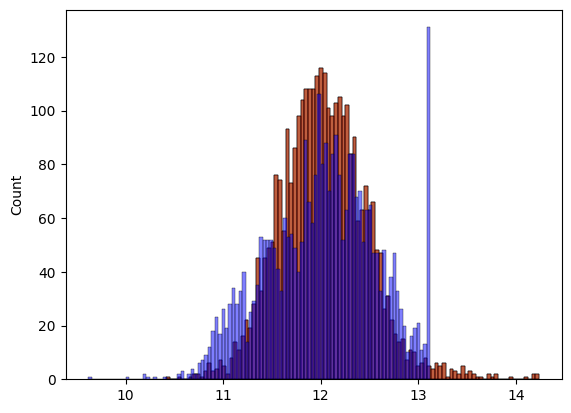

In [22]:
sns.histplot(y_pred_1, color='green', alpha=0.5, bins=100)
sns.histplot(y_pred_2, color='red', alpha=0.5, bins=100)
sns.histplot(y_val, color='blue', alpha=0.5, bins=100)

In [33]:
#model 1
print(rmse(y_val, y_pred_1))
#model 2
print(rmse(y_val, y_pred_2))

0.7246868081466165
0.7246868081466165


### Question 4  
Now let's train a regularized linear regression.  
For this question, fill the NAs with 0.  
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].  
Use RMSE to evaluate the model on the validation dataset.  
Round the RMSE scores to 2 decimal digits.  
Which r gives the best RMSE?  
If there are multiple options, select the smallest r.  

Options:  
  
0  
0.000001  
0.001  
0.0001  


In [24]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [40]:
for r in [0, 0.000001, 0.0001, 0.001]:
    w0, w = train_linear_regression_reg(X_train_1, y_train, r=r)
    y_pred = w0 + X_val_1.dot(w)
    score = rmse(y_val, y_pred)
    
    print(f'for reg. : {r}, intercect: {w0}, rmse: {score:.3}')

for reg. : 0, intercect: -9.91480350398978, rmse: 0.338
for reg. : 1e-06, intercect: -9.914782312520927, rmse: 0.338
for reg. : 0.0001, intercect: -9.912684797638116, rmse: 0.338
for reg. : 0.001, intercect: -9.893657097212976, rmse: 0.338


In [28]:
def create_datasets(n, df_data, random_seed):
    huffle_idx = np.arange(n)
    np.random.seed(random_seed)
    np.random.shuffle(shuffle_idx)
    
    percent60 = int(shuffle_idx.size*0.6) # size of 60%
    percent80 = int(shuffle_idx.size*0.8) # size of 80%
    
    df_train =  df_data.iloc[shuffle_idx[:percent60]]
    df_val   =  df_data.iloc[shuffle_idx[percent60:percent80]]
    df_test  =  df_data.iloc[shuffle_idx[percent80:]]
    
    y_train = df_train.median_house_value.values
    y_val = df_val.median_house_value.values
    y_test = df_test.median_house_value.values
    
    df_train.drop('median_house_value', axis=1, inplace=True)
    df_val.drop('median_house_value', axis=1, inplace=True)
    df_test.drop('median_house_value', axis=1, inplace=True)

    df_train.total_bedrooms.fillna(0.0, inplace=True)
    df_val.total_bedrooms.fillna(0.0, inplace=True)
    df_test.total_bedrooms.fillna(0.0, inplace=True)

    return df_train.values, y_train, df_val.values, y_val, df_test.values, y_test

In [41]:
rmse_list = []
for random_seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] : 
    X_train, y_train, X_val, y_val, X_test, y_test = create_datasets(n, df_data, random_seed)
    w0, w = train_linear_regression(X_train, y_train)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    rmse_list.append(score)
    print(f'for random_seed : {random_seed}, intercect: {w0}, rmse: {score}')

rnd_std = np.std(rmse_list)
print(f'The random seed std is :{round(rnd_std, 3)}')

for random_seed : 0, intercect: -10.206128152412258, rmse: 0.3445825200665128
for random_seed : 1, intercect: -10.128018701703683, rmse: 0.3428404981685552
for random_seed : 2, intercect: -9.926440850271865, rmse: 0.33845047702027176
for random_seed : 3, intercect: -9.908769185853913, rmse: 0.33241591218493877
for random_seed : 4, intercect: -9.592927050065137, rmse: 0.3349519061221672
for random_seed : 5, intercect: -9.677141116896413, rmse: 0.3356795105342621
for random_seed : 6, intercect: -9.899292440118291, rmse: 0.342057590151616
for random_seed : 7, intercect: -9.973860635110974, rmse: 0.3337976159900165
for random_seed : 8, intercect: -10.196479046954845, rmse: 0.3443619688047981
for random_seed : 9, intercect: -9.98039149171813, rmse: 0.3471256669679526
The random seed std is :0.005


In [31]:
random_seed = 9
X_train, y_train, X_val, y_val, X_test, y_test = create_datasets(n, df_data, random_seed)
w0, w = train_linear_regression_reg(np.concatenate((X_train,X_val), axis=0), np.concatenate((y_train, y_val), axis=0), r=0.001)

y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)

print(f'for random_seed : {random_seed}, intercect: {w0}, rmse: {score:.3}')


for random_seed : 9, intercect: -9.755394176732016, rmse: 0.337
